In [20]:
from posterior import *
import numpy as np
#best_estimates = main()
import pandas as pd

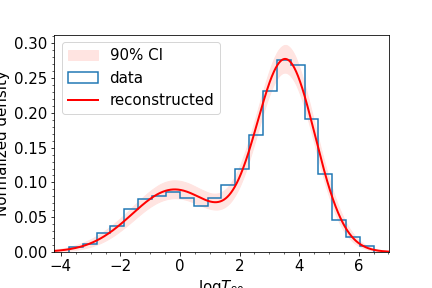

P(k = 1) = 0.945
P(k = 2) = 0.055


In [30]:
%matplotlib widget
n_gauss = 2
path = f'results/{n_gauss}gauss_additional_priors'#_gaussian_errors'
#path = 'results/2gauss'
data_file = 'data/GRB_data.txt'
    
#retrieve data
data = np.genfromtxt(data_file)
logT90, dlogT90, HR = data.T

#retrieve posterior samples
posteriors = Posteriorsamples(path, 'posterior.dat')
best_estimates, _ = posteriors.get_best_estimate(CL='68')
posteriors.plot_posterior_mixture(data = logT90, CL=90)

T90 = np.log(2)
P1 = posteriors.compute_class_prob(T90, 1)
P2 = posteriors.compute_class_prob(T90, 2)
if n_gauss == 3:
    P3 = posteriors.compute_class_prob(T90, 3)


In [33]:
np.log(2.3)

0.8329091229351039

In [17]:
Z3 = posteriors.compute_evidence(logT90, N = int(1e5))

100%|█████████████████████████████████| 100000/100000 [00:20<00:00, 4970.04it/s]

Final Evidence = 257.5077794566493


In [19]:
Z2 = posteriors.compute_evidence(logT90, N = int(1e5))

100%|█████████████████████████████████| 100000/100000 [00:13<00:00, 7380.85it/s]

Final Evidence = 320.849062231741


In [21]:
Z2/Z3

1.2459781328111488

P(k=k_i) = 0.5 => logT90 = 1.606 s  ==> T90 = 4.981 s


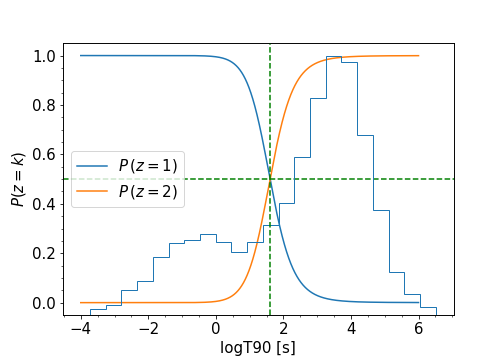

In [31]:
x = np.linspace(-4, 6, 10000)
P1 = []
P2 = []
for _logT90 in x:
    P1.append(posteriors.compute_class_prob(_logT90, 1, verbose = False))
    P2.append(posteriors.compute_class_prob(_logT90, 2, verbose = False))

P1 = np.array(P1); P2 = np.array(P2)

plt.rcParams['font.size']=15

fig, ax = plt.subplots(figsize=(7,5))
twin1 = ax.twinx()
twin1.hist(logT90, density=False, bins='fd', histtype='step', label='data')

ax.plot(x, P1, label='$P\,(z=1)$')
ax.plot(x, P2, label = '$P\,(z=2)$')
#ax.plot(x, 10*P2*P1)

imax = np.where(P2*P1 == max(P2*P1))
plt.axvline(x[imax], linestyle='--', color='g')
ax.axhline(0.5, linestyle='--', color='g')
ax.minorticks_on()
ax.legend(loc = 'center left')

ax.set_xlabel('logT90 [s]')
ax.set_ylabel('$P(z = k)$')
twin1.set_yticks([])
print('P(k=k_i) = 0.5 => logT90 = %.3f s  ==> T90 = %.3f s' %(x[imax], np.exp(x[imax])))


plt.savefig(f'{path}/threshold.png', dpi = 200)


In [6]:
#%matplotlib inline
#posteriors.corner_plot(50)

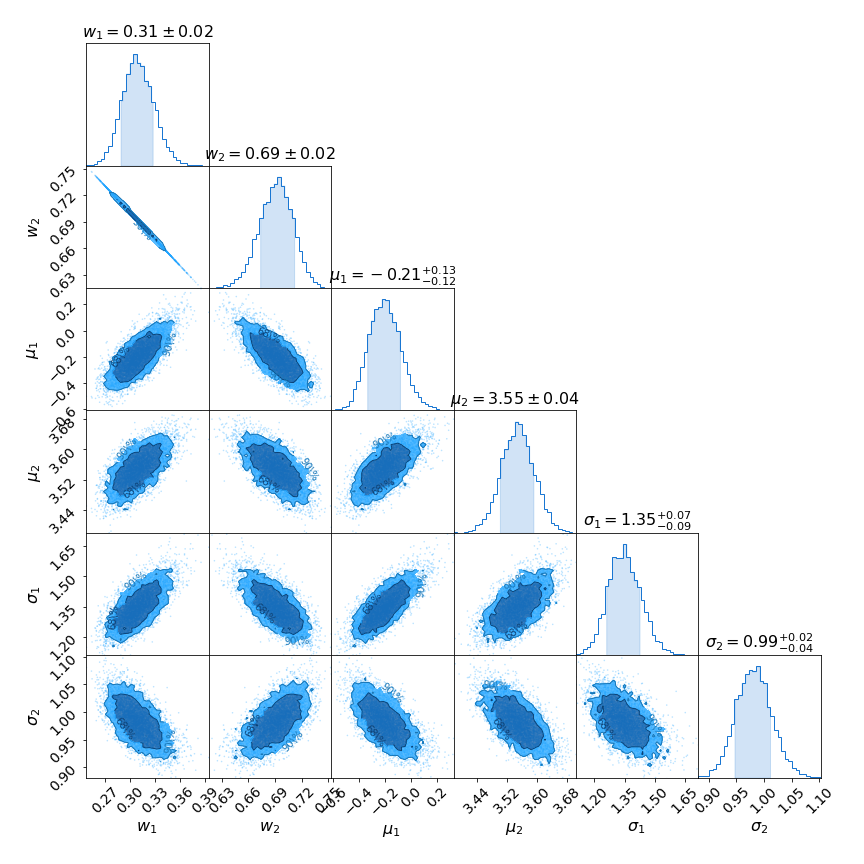

In [29]:
from chainconsumer import ChainConsumer

parameters = posteriors.latex_names
data = []
for name, latex_name in zip(posteriors.samples.keys(), parameters):
    data.append(posteriors.samples[name])
data = np.array(data)

c = ChainConsumer().add_chain(data.T, parameters = parameters).configure(statistics="max_shortest", 
                                                                         smooth = 0,
                                                                         cloud=True,
                                                                         summary=True,
                                                                         #summary_area = 0.68,
                                                                         sigma2d=False,
                                                                     contour_labels = 'confidence', 
                                                                         sigmas=[0, 1, 1.645],
                                                                         tick_font_size=14, 
                                                                         label_font_size=16
                                                                        )

fig = c.plotter.plot(filename = 'corner_plot.png')
fig.set_size_inches(3 + fig.get_size_inches())  # Resize fig for doco. You don't need this.

# LogT90 - HR 

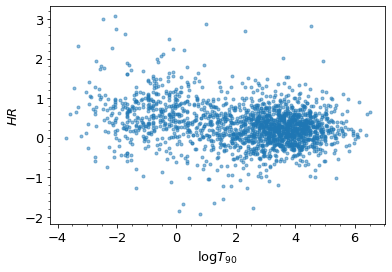

In [18]:
%matplotlib inline
plt.figure()
plt.rcParams['font.size']=13
plt.scatter(logT90, HR, alpha = .5, marker='.')
plt.xlabel('log$T_{90}$')
plt.ylabel('$HR$')
plt.minorticks_on()
plt.savefig('logT90-HR.png', dpi=200)

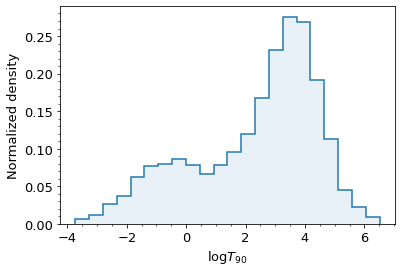

In [9]:
plt.figure()
plt.rcParams['font.size']=13
hist = plt.hist(logT90, 'fd', histtype='step', linewidth = 1.5,color=colours[0], density=True )
plt.hist(logT90, 'fd', histtype='stepfilled', alpha = 0.1, linewidth = 2,color=colours[0], density=True )

bins, counts = hist[1], hist[0]
bin_c = (bins[0:-1]+bins[1:])/2
poiss_err = np.sqrt(counts)
#plt.errorbar(bin_c, counts, yerr=poiss_err, fmt='.')



plt.xlabel('log$T_{90}$')
plt.ylabel('Normalized density')
plt.minorticks_on()
plt.savefig('logT90.png', dpi=200)




